**Problema**

*1)* Considere o conjunto de dados disponível em californiabin.csv, organizado
em 9 colunas, sendo as 8 primeiras colunas os atributos e a última coluna a
saída. Os 8 atributos são usados na predição de preços de casas em distritos
da Califórnia na década de 1990. A saída é binária: 0, para abaixo da mediana
dos preços; 1, para acima da mediana dos preços. Maiores detalhes sobre os da-
dos podem ser conferidos em https://scikit-learn.org/stable/datasets/
real_world.html#california-housing-dataset.


a) Considerando uma divisão de 80% dos padrões para treinamento e 20%
para teste, avalie modelos de classificação binária nos dados em questão.




b) Para cada modelo campeão, reporte os hiperparâmetros selecionados e
as métricas de acurácia, revocação, precisão e F1-score nos dados
de teste. Plote também a curva ROC e a curva Precision-Recall,
reportando as áreas sob as curvas, i.e., AUROC e AUPRC.
Observações:
→Use validações cruzadas em 10 folds no interior do grid-search.
→Não esqueça de retreinar o modelo final com os hiperparâmetros otimiza-
dos usando tanto os dados de treino quanto de validação.
1


**Resposta**

In [2]:
#importando dataset

import pandas as pd
import numpy as np

data=pd.read_csv('californiabin.csv')

 
import sweetviz as sv
report = sv.analyze(data)
report.show_html('california_sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report california_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [3]:
data.head(10)

,4.168499999999999872e+00,2.000000000000000000e+01,6.700636942675159524e+00,1.178343949044585948e+00,7.450000000000000000e+02,2.372611464968152895e+00,3.879999999999999716e+01,-1.211500000000000057e+02,1.000000000000000000e+00
0,2.8194,24.0,4.762500,1.020833,608.0,2.533333,36.75,-119.85,0.0
1,2.4250,46.0,4.927711,1.018072,772.0,2.325301,36.33,-119.31,0.0
2,3.1205,16.0,3.728477,1.101545,1260.0,2.781457,33.87,-117.99,0.0
3,4.3889,41.0,5.741007,1.199041,837.0,2.007194,34.15,-118.40,1.0
4,2.9934,52.0,3.441379,1.020690,318.0,2.193103,37.57,-122.32,1.0
5,6.8564,42.0,6.452055,1.041096,630.0,2.876712,33.95,-118.14,1.0
6,3.3067,17.0,4.849181,1.032746,7302.0,2.299118,32.83,-117.01,0.0
7,2.7500,27.0,5.003086,0.996914,882.0,2.722222,36.55,-119.43,0.0
8,2.1964,30.0,2.343915,0.899471,903.0,4.777778,33.93,-118.22,0.0
9,3.6650,52.0,4.088235,0.852941,523.0,3.076471,34.07,-118.14,1.0


In [4]:
#vamos renomear  as colunas de acordo com o artigo do kaggle 

renomear_colunas={'4.168499999999999872e+00':'MedInc',
                  	'2.000000000000000000e+01':'HouseAge',
                    '6.700636942675159524e+00':'AveRooms',
                    '1.178343949044585948e+00': 'AveBedrms',
                   '7.450000000000000000e+02':'Population',
                    '2.372611464968152895e+00':'AveOccup',
                     '3.879999999999999716e+01': 'Latitude',
                     '-1.211500000000000057e+02':'Longitude',
                     '1.000000000000000000e+00':'MedHouseVal'}
data.rename(columns=renomear_colunas, inplace=True)


In [5]:
data.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.8194,24.0,4.762500,1.020833,608.0,2.533333,36.75,-119.85,0.0
1,2.4250,46.0,4.927711,1.018072,772.0,2.325301,36.33,-119.31,0.0
2,3.1205,16.0,3.728477,1.101545,1260.0,2.781457,33.87,-117.99,0.0
3,4.3889,41.0,5.741007,1.199041,837.0,2.007194,34.15,-118.40,1.0
4,2.9934,52.0,3.441379,1.020690,318.0,2.193103,37.57,-122.32,1.0
5,6.8564,42.0,6.452055,1.041096,630.0,2.876712,33.95,-118.14,1.0
6,3.3067,17.0,4.849181,1.032746,7302.0,2.299118,32.83,-117.01,0.0
7,2.7500,27.0,5.003086,0.996914,882.0,2.722222,36.55,-119.43,0.0
8,2.1964,30.0,2.343915,0.899471,903.0,4.777778,33.93,-118.22,0.0
9,3.6650,52.0,4.088235,0.852941,523.0,3.076471,34.07,-118.14,1.0


In [14]:
report_2= sv.analyze(data)
report_2.show_html('california_sweetviz_report_2.html')

                                             |          | [  0%]   00:00 -> (? left)

Report california_sweetviz_report_2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
#O relatória gerado pelo Sweetviz indica que o Standard Scaler é um bom método para normalização dos dos dados de treino


from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]


y = data.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)



Bibliotecas Necessárias para a tarefa daqui para frente:

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, precision_recall_curve, roc_auc_score, average_precision_score,
    classification_report
)
import matplotlib.pyplot as plt


pipeline para o SVM


In [17]:

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC( probability=True, random_state=69))
])
 
# Hiperparâmetros
C_range = [2**i for i in range(-5, 16, 2)]    # 2^-5 a 2^15
gamma_range = [2**i for i in range(-15, 4, 2)] # 2^-15 a 2^3

svm_params =[ {
    'svm__C': C_range,
    'svm__gamma': gamma_range,
    'svm__kernel': ['rbf']
},
{
    'svm__C': C_range,
    'svm__kernel': ['linear']
}, 
{
    'svm__C': C_range,
    'svm__degree': [2, 3, 4],
    'svm__kernel': ['poly'] },
{
    'svm__C': C_range,
    'svm__kernel': ['sigmoid'],
    'svm__gamma': gamma_range
    }
]
svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)


Fitting 5 folds for each of 264 candidates, totalling 1320 fits


,estimator,Pipeline(step...m_state=69))])
,param_grid,"[{'svm__C': [0.03125, 0.125, ...], 'svm__gamma': [3.0517578125e-05, 0.0001220703125, ...], 'svm__kernel': ['rbf']}, {'svm__C': [0.03125, 0.125, ...], 'svm__kernel': ['linear']}, ...]"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


Pipeline para o Random Forest

In [18]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('rf', RandomForestClassifier(random_state=69))
])

rf_params = {
    'rf__n_estimators': list(range(10, 201, 10)),
    'rf__max_depth': [4, 6, 8, 10, None],
    #agora vamos setar o bootstrap
    'rf__bootstrap': [True, False],
    #agora vamo setar se vamos usar o critério de entropia ou gini
    'rf__criterion': ['gini', 'entropy']
}

rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=10, scoring='f1', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)


Fitting 10 folds for each of 400 candidates, totalling 4000 fits


,estimator,Pipeline(step...m_state=69))])
,param_grid,"{'rf__bootstrap': [True, False], 'rf__criterion': ['gini', 'entropy'], 'rf__max_depth': [4, 6, ...], 'rf__n_estimators': [10, 20, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,10
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


Re-treino com melhores parâmetros(campeões)

In [19]:
# campeões
best_svm = svm_grid.best_estimator_
best_rf = rf_grid.best_estimator_

# Refit em treino completo
best_svm.fit(X_train, y_train)
best_rf.fit(X_train, y_train)


,steps,"[('scaler', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,120
,criterion,'entropy'
,max_depth,None
,min_samples_split,2


Avaliação:


=== SVM com RBF ===
              precision    recall  f1-score   support

         0.0     0.8549    0.8010    0.8271       206
         1.0     0.8019    0.8557    0.8279       194

    accuracy                         0.8275       400
   macro avg     0.8284    0.8283    0.8275       400
weighted avg     0.8292    0.8275    0.8275       400

AUROC: 0.9178
AUPRC: 0.9092


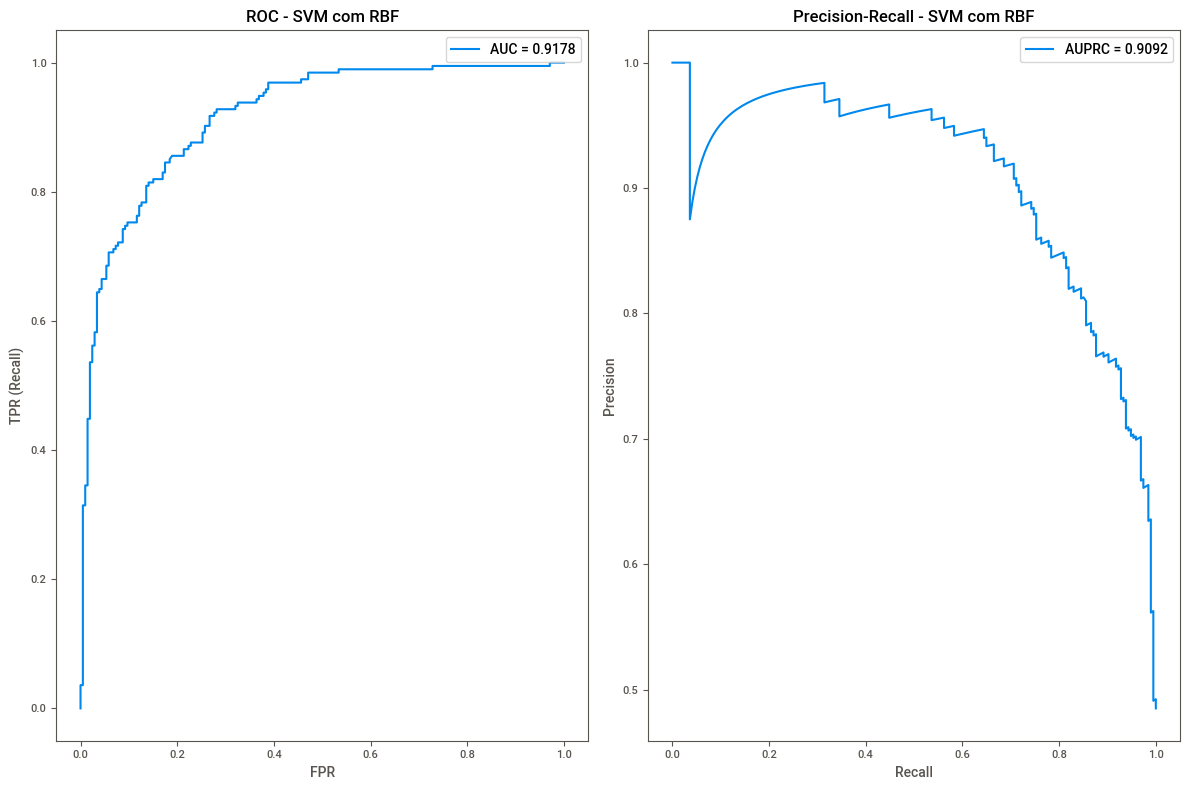


=== Random Forest ===
              precision    recall  f1-score   support

         0.0     0.8558    0.8641    0.8599       206
         1.0     0.8542    0.8454    0.8497       194

    accuracy                         0.8550       400
   macro avg     0.8550    0.8547    0.8548       400
weighted avg     0.8550    0.8550    0.8550       400

AUROC: 0.9340
AUPRC: 0.9331


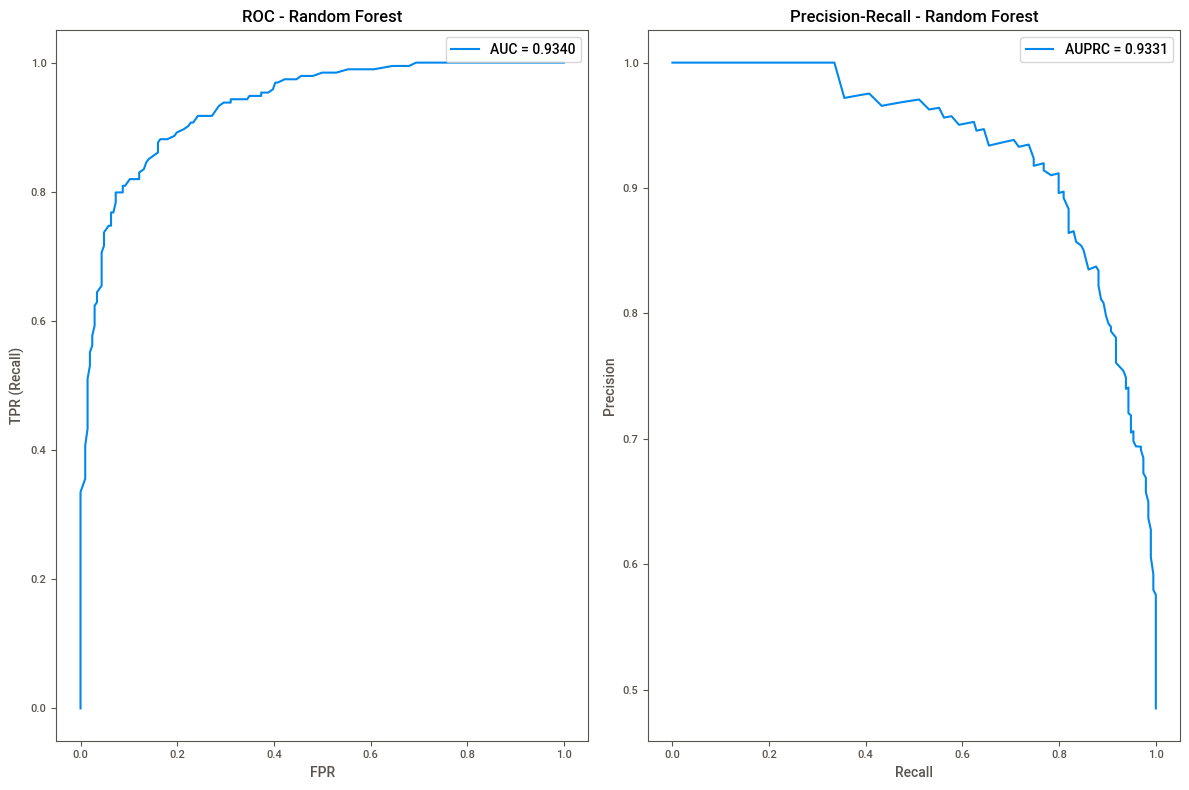

In [20]:
def avaliar_modelo(modelo, X_test, y_test, nome="Modelo"):
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    print(f"\n=== {nome} ===")
    print(classification_report(y_test, y_pred, digits=4))

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)

    auc_roc = roc_auc_score(y_test, y_proba)
    auc_pr = average_precision_score(y_test, y_proba)

    print(f"AUROC: {auc_roc:.4f}")
    print(f"AUPRC: {auc_pr:.4f}")

    # Curvas
    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.4f}')
    plt.xlabel('FPR')
    plt.ylabel('TPR (Recall)')
    plt.title(f'ROC - {nome}')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'AUPRC = {auc_pr:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall - {nome}')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Avaliação
avaliar_modelo(best_svm, X_test, y_test, nome="SVM com RBF")
avaliar_modelo(best_rf, X_test, y_test, nome="Random Forest")


Relatório de hiperparâmetros

In [21]:
print("Melhores hiperparâmetros - SVM:", svm_grid.best_params_)
print("Melhores hiperparâmetros - Random Forest:", rf_grid.best_params_)


Melhores hiperparâmetros - SVM: {'svm__C': 32768, 'svm__gamma': 0.0078125, 'svm__kernel': 'rbf'}
Melhores hiperparâmetros - Random Forest: {'rf__bootstrap': False, 'rf__criterion': 'entropy', 'rf__max_depth': None, 'rf__n_estimators': 120}


Dump dos modelos


In [12]:
#vamos fazer o dump dos modelos
import joblib


In [11]:
#agora vamos predizer com os modelos para testar 
svm_model = joblib.load('models/notebook_model_rf.pkl')
rf_model = joblib.load('models/notebook_model_svm.pkl')

input_instance = np.array([[0.3252, 2.0, 1.984127, 1.023810, 322.0, 2.555556, 37.88, -122.23]])
svm_prediction = svm_model.predict(input_instance)
rf_prediction = rf_model.predict(input_instance)
print("Predição SVM:", svm_prediction)
print("Predição Random Forest:", rf_prediction)

Predição SVM: [0.]
Predição Random Forest: [0.]


c:\Users\joaol\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\joaol\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import joblib
import pandas as pd

modelo_path = 'C:/Users/joaol/Downloads/ama_lista_05/mlruns/rf_logs/models/m-9b2bcab03e6d4bf998ce4c96cbc655cd/artifacts/model.pkl'
model = joblib.load(modelo_path)


#como carreguei o modelo usando uma pipeline com nomes diferentes das colunas do dataset, preciso garantir que o dataset de teste tenha as mesmas colunas e na mesma ordem
X_test_numpy = X_test.values


y_pred = model.predict(X_test_numpy)
y_proba = model.predict_proba(X_test_numpy)[:, 1]


print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.8510    0.8592    0.8551       206
         1.0     0.8490    0.8402    0.8446       194

    accuracy                         0.8500       400
   macro avg     0.8500    0.8497    0.8498       400
weighted avg     0.8500    0.8500    0.8500       400



c:\Users\joaol\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\joaol\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
